In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Data Preprocessing

## Data obtaining

In [567]:
raw_df = pd.read_csv('ArgentinaRemuneracion.csv')

In [568]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 50 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estoy_trabajando_en                                                                   5767 non-null   object 
 1   donde_estas_trabajando                                                                5767 non-null   object 
 2   dedicacion                                                                            5767 non-null   object 
 3   tipo_de_contrato                                                                      5767 non-null   object 
 4   ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                              5767 non-null   float64
 5   ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                            

In [569]:
inputs = ['donde_estas_trabajando', 'dedicacion', 'tipo_de_contrato', 'recibis_algun_tipo_de_bono', 'tengo_edad', 'sueldo_dolarizado', 'seniority', 
          'anos_de_experiencia','cuantas_personas_a_cargo_tenes', 'tiempo_en_el_puesto_actual', 'antigüedad_en_la_empresa_actual', 'cantidad_de_personas_en_tu_organizacion',
          'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina', 'trabajo_de', 'modalidad_de_trabajo'
         ]
target = ['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local']
inputs_df = raw_df[inputs+target].copy()

In [570]:
inputs_df.describe()

,anos_de_experiencia,cuantas_personas_a_cargo_tenes,tiempo_en_el_puesto_actual,antigüedad_en_la_empresa_actual,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
count,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5.767000e+03
mean,7.122733,2.001734,2.466829,2.967938,0.657361,4.372717e+05
std,7.076138,8.072448,26.691824,4.471850,1.146179,3.044232e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000e+04
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.300000e+05
50%,5.000000,0.000000,1.000000,1.500000,0.000000,3.500000e+05
75%,10.000000,1.000000,3.000000,3.000000,1.000000,5.419000e+05
max,48.000000,200.000000,2016.000000,75.000000,5.000000,1.736000e+06


In [571]:
inputs_df.dropna(subset=['tiempo_en_el_puesto_actual'], inplace=True)
inputs_df = inputs_df[inputs_df['tiempo_en_el_puesto_actual'] < 50]

In [572]:
raw_df = pd.read_csv('ArgentinaRemuneracion.csv')
reemplazos = {
    'Varios': [','],
    'Jefe': ['jefe'],
    'Profesor': ['teacher', 'profesor', 'maestro', 'docente', 'academ'],
    'Ingeniero': ['engineer', 'ingeniero', 'enginer', 'ware', 'engenier'],
    'AI Scientist': ['ai', 'ia', 'learning'],
    'Analista': ['analista', 'analyst', 'sistema', 'análisista', 'data', 'datos'],
    'Administrador': ['admin', 'manage'],
    'Profesor': ['profe', 'maestro'],
    'Técnico': ['tec'],
    'Developer': ['dev', 'desarr'],
    'IT': ['it', 'ti'],
    'Cibernéticos': ['cyber', 'ciber'],
    'Coordinador': ['coordinador'],
    'Lider': ['lider', 'líder', 'leader'],
    'Customer Service': ['customer', 'cliente'],
    'Infraestructura': ['infra'],
    'Agente': ['agent', 'seguros', 'sales', 'ventas'],
    'Designer': ['designer', 'diseñador'],
    'Web': ['maquetador', 'web'],
    'Finanzas': ['finanzas', 'contador', 'finance'],
    'Soporte': ['support', 'soporte', 'support']
}

In [573]:
inputs_df.trabajo_de.value_counts()

Developer                                                  2219
SysAdmin / DevOps / SRE                                     533
Technical Leader                                            359
QA / Tester                                                 241
Manager / Director                                          207
                                                           ... 
Analista Tecnico                                              1
Hago de todo... soporte, infra, desarrollo, guardias...       1
Analista de sistemas empresariales                            1
Product Marketing Specialist                                  1
IT Risk & Compliance                                          1
Name: trabajo_de, Length: 354, dtype: int64

In [574]:
def reemplazar_trabajo(cadena):
    for reemplazo, palabras in reemplazos.items():
        for palabra in palabras:
            if palabra in cadena.lower():
                return reemplazo
    return 'Otros'

In [575]:
inputs_df['trabajo_de'] = inputs_df['trabajo_de'].apply(reemplazar_trabajo)
raw_df['trabajo_de'] = raw_df['trabajo_de'].apply(reemplazar_trabajo)
display(inputs_df.trabajo_de.unique())

array(['Developer', 'Administrador', 'Técnico', 'Otros', 'Soporte',
       'Ingeniero', 'IT', 'Analista', 'Designer', 'AI Scientist',
       'Finanzas', 'Jefe', 'Coordinador', 'Cibernéticos', 'Agente',
       'Customer Service', 'Varios', 'Infraestructura', 'Lider',
       'Profesor', 'Web'], dtype=object)

In [576]:
inputs_df['tengo_edad'] = pd.to_numeric(inputs_df['tengo_edad'], errors='coerce')
inputs_df.dropna(subset=['tengo_edad'], inplace=True)
inputs_df = inputs_df[(inputs_df['tengo_edad'] > 18) & (inputs_df['tengo_edad'] < 80)]
targets = inputs_df[target]
inputs_df = inputs_df.drop('ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local', axis=1)
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5746 entries, 0 to 5766
Data columns (total 15 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   donde_estas_trabajando                                                         5746 non-null   object 
 1   dedicacion                                                                     5746 non-null   object 
 2   tipo_de_contrato                                                               5746 non-null   object 
 3   recibis_algun_tipo_de_bono                                                     5746 non-null   object 
 4   tengo_edad                                                                     5746 non-null   float64
 5   sueldo_dolarizado                                                              5746 non-null   bool   
 6   seniority               

## Data visualization

In [577]:
sns.set_theme()

Text(0, 0.5, 'Cuenta')

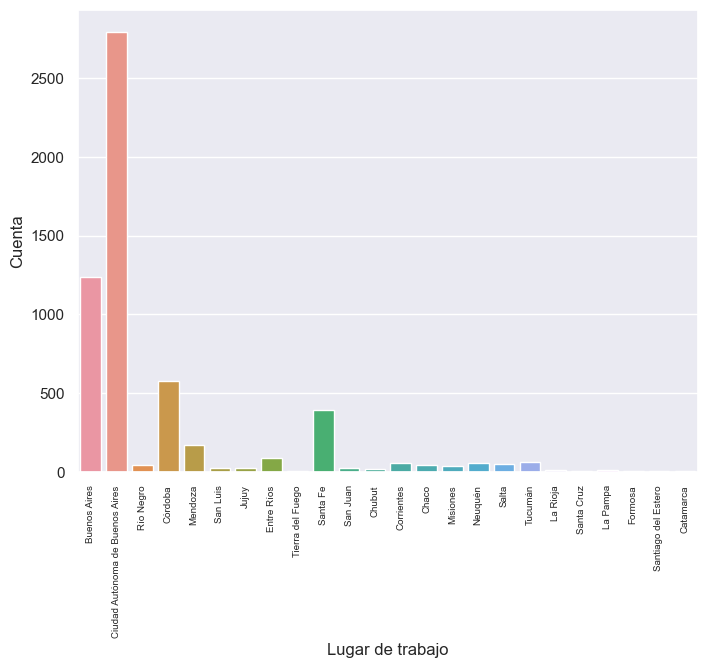

In [578]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='donde_estas_trabajando')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize=7);
ax.set_xlabel("Lugar de trabajo");
ax.set_ylabel("Cuenta")

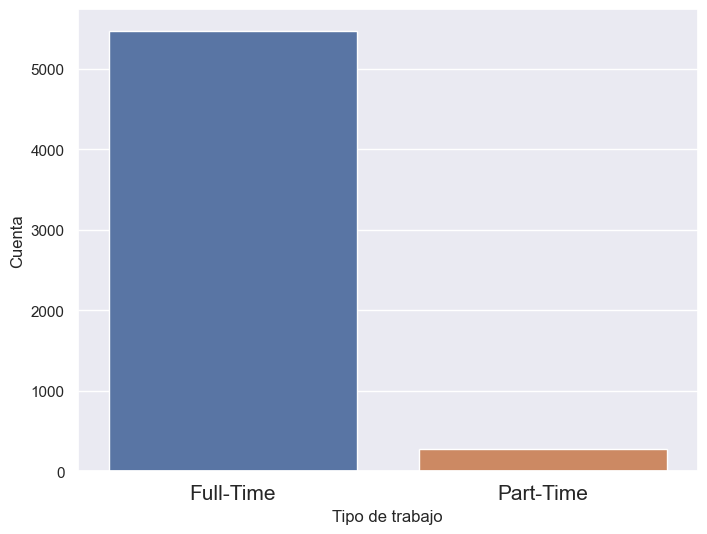

In [579]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='dedicacion')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15);
ax.set_xlabel("Tipo de trabajo");
ax.set_ylabel("Cuenta");

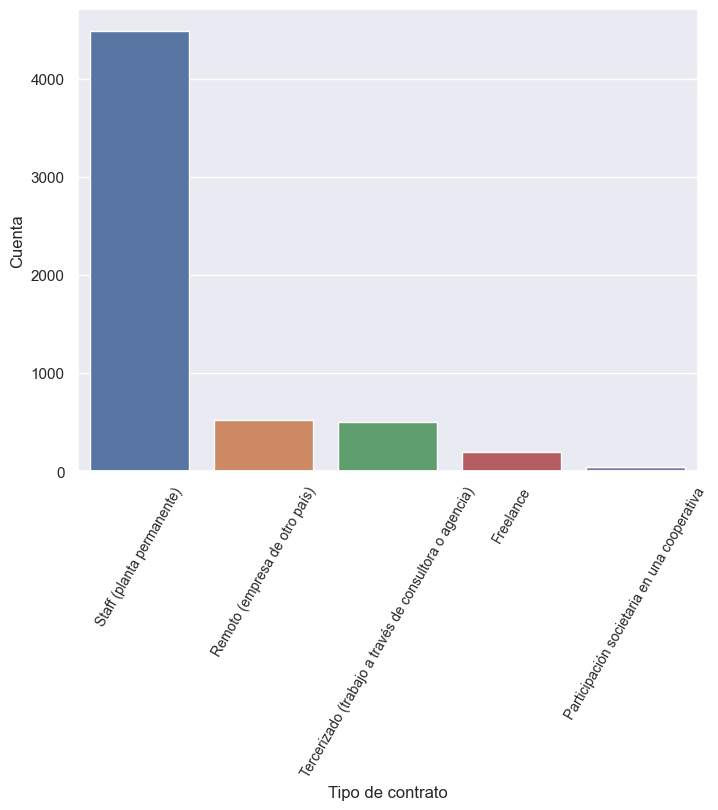

In [580]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='tipo_de_contrato')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=60);
ax.set_xlabel("Tipo de contrato");
ax.set_ylabel("Cuenta");

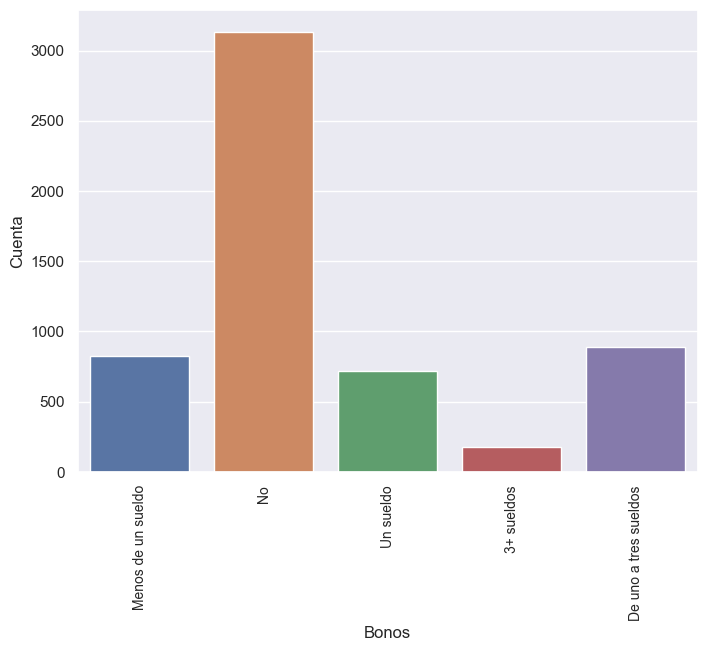

In [581]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='recibis_algun_tipo_de_bono')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90);
ax.set_xlabel("Bonos");
ax.set_ylabel("Cuenta");

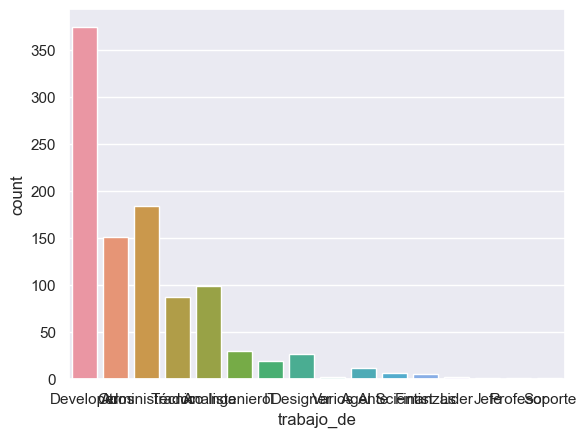

In [582]:
sns.countplot(data=inputs_df.sample(1000), x='trabajo_de');

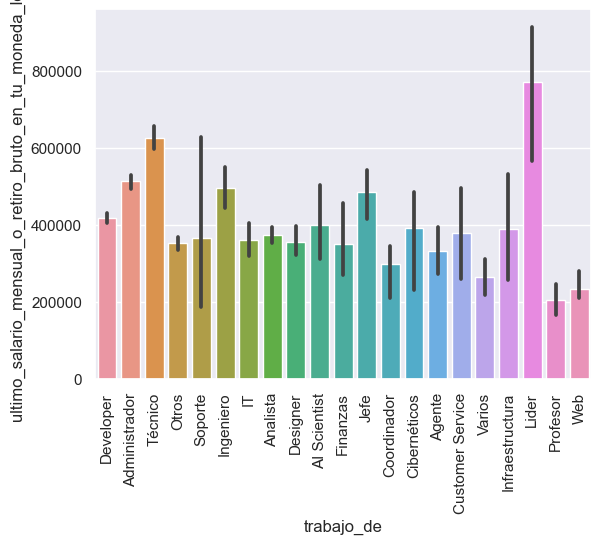

In [583]:
sns.barplot(data=raw_df, x='trabajo_de', y='ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local');
plt.xticks(rotation=90);

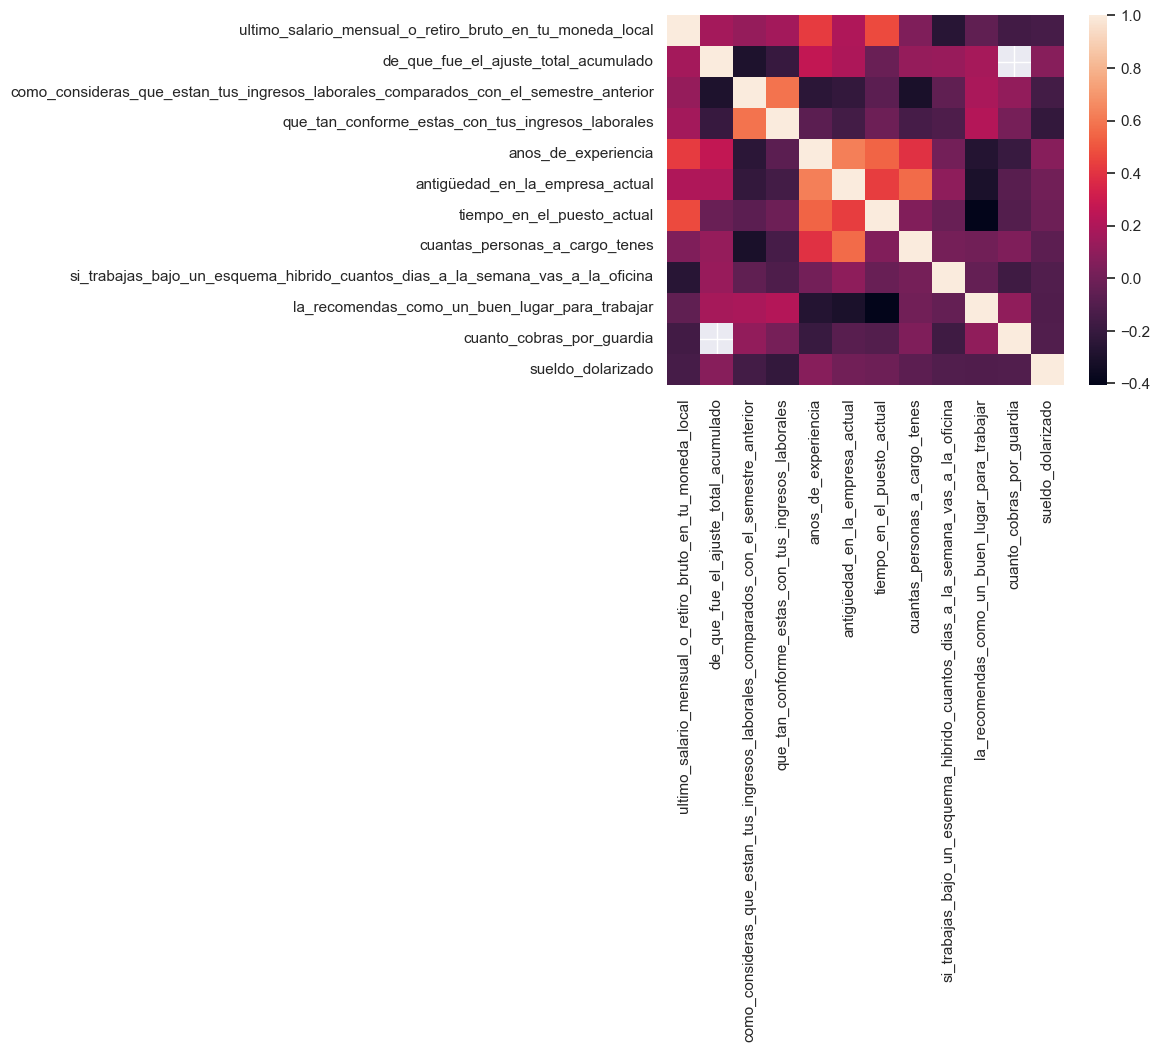

In [584]:
sns.heatmap(raw_df.sample(50).corr(numeric_only=True));

## Data encoding & scaling

In [585]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5746 entries, 0 to 5766
Data columns (total 15 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   donde_estas_trabajando                                                         5746 non-null   object 
 1   dedicacion                                                                     5746 non-null   object 
 2   tipo_de_contrato                                                               5746 non-null   object 
 3   recibis_algun_tipo_de_bono                                                     5746 non-null   object 
 4   tengo_edad                                                                     5746 non-null   float64
 5   sueldo_dolarizado                                                              5746 non-null   bool   
 6   seniority               

In [586]:
numeric_cols = inputs_df.select_dtypes(include='float64').columns.tolist()
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [587]:
scaler = StandardScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [588]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

C:\Users\angel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [589]:
inputs_df

,donde_estas_trabajando,dedicacion,tipo_de_contrato,recibis_algun_tipo_de_bono,tengo_edad,sueldo_dolarizado,seniority,anos_de_experiencia,cuantas_personas_a_cargo_tenes,tiempo_en_el_puesto_actual,...,trabajo_de_Lider,trabajo_de_Otros,trabajo_de_Profesor,trabajo_de_Soporte,trabajo_de_Técnico,trabajo_de_Varios,trabajo_de_Web,modalidad_de_trabajo_100% presencial,modalidad_de_trabajo_100% remoto,modalidad_de_trabajo_Híbrido (presencial y remoto)
0,Buenos Aires,Full-Time,Staff (planta permanente),Menos de un sueldo,-1.056291,False,Semi-Senior,-0.583468,0,-0.698159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-0.801620,False,Junior,-0.724837,3,-0.368762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-1.565633,False,Junior,-1.007575,0,-0.698159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Un sueldo,-1.056291,False,Semi-Senior,-0.583468,0,-0.368762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Río Negro,Full-Time,Staff (planta permanente),Un sueldo,-1.183626,True,Junior,-1.007575,0,-0.698159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),De uno a tres sueldos,0.726406,False,Senior,1.537066,3,-0.039366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5763,Tucumán,Full-Time,Staff (planta permanente),Un sueldo,0.853742,False,Senior,1.395697,8,0.290030,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5764,Buenos Aires,Part-Time,Freelance,No,-1.565633,False,Senior,-0.017992,3,1.607616,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5765,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-0.546949,False,Semi-Senior,-0.442099,2,0.290030,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train split

In [590]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [591]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

## Misc

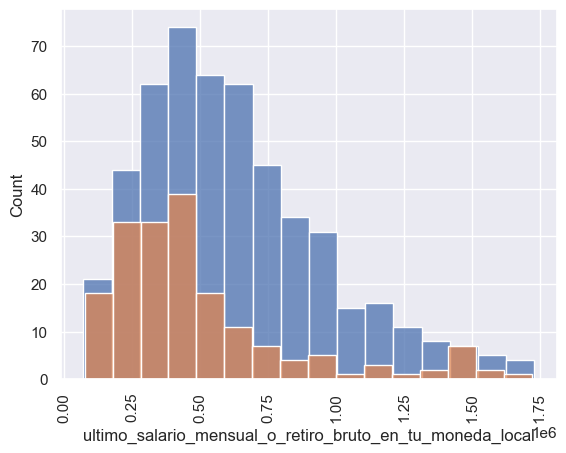

In [592]:
sns.histplot(data=raw_df[raw_df['trabajo_de'] == 'Técnico'], x='ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local');
sns.histplot(data=raw_df[raw_df['trabajo_de'] == 'Ingeniero'], x='ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local');
plt.xticks(rotation=90);

# Data processing

In [593]:
dummy = np.full(len(val_targets), targets.mean())
print(mean_squared_error(dummy, val_targets, squared=False), r2_score(val_targets, dummy))

312165.63032968744 -0.00033158887542850124


In [594]:
def test_params(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(X_train, train_targets)
    train_rmse = mean_squared_error(model.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets, squared=False)
    train_r2 = r2_score(train_targets, model.predict(X_train))
    val_r2 = r2_score(val_targets, model.predict(X_val)) 
    return train_rmse, val_rmse, train_r2, val_r2

In [595]:
test_params(max_depth=100, max_leaf_nodes=35, max_features=60)

(232499.92533851694,
 241599.8192139361,
 0.40734885110316643,
 0.4008065974814037)

In [596]:
def testf_params(**params):
    model = RandomForestRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [597]:
testf_params(max_depth=30, max_leaf_nodes=30, n_jobs=-1, max_features=50, n_estimators=20)

C:\Users\angel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(227003.37479329706, 238580.3782010035)

In [598]:
def testl_params(**params):
    model = LinearRegression().fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [599]:
testl_params()

(234799.86316768426, 239156.94933691292)

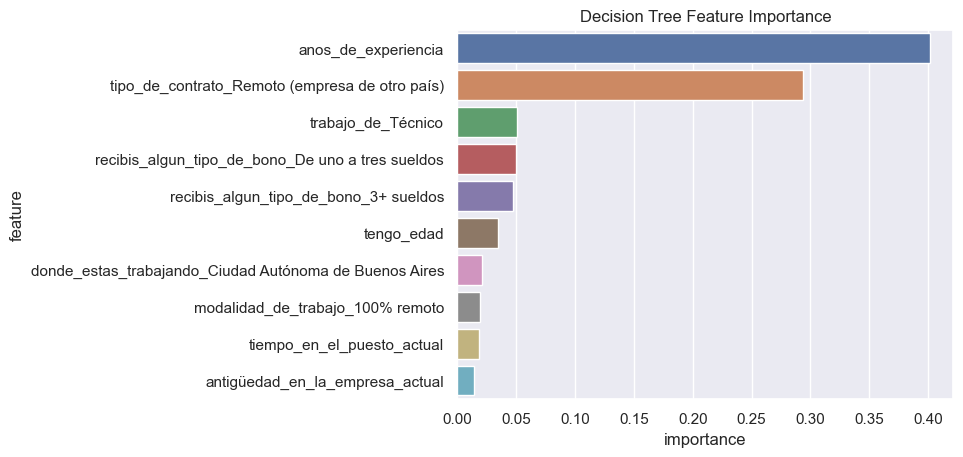

In [600]:
tree_importances = tree.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');